<a href="https://colab.research.google.com/github/NishigandhaS/Mashable-Dataset-/blob/master/Mashable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(io.StringIO(uploaded['OnlineNewsPopularity.csv'].decode('utf-8')))
df.head()

Saving OnlineNewsPopularity.csv to OnlineNewsPopularity.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
types = [' data_channel_is_lifestyle',' data_channel_is_entertainment', ' data_channel_is_bus',' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_world']

df1 = df[types]
df1.head()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0


In [7]:
def get_cat(m): #Function created to combine multiple columns into 1. Dataset is currently one hot encoded.
    for i in types:
        if m[i]==1:
            return i

In [8]:
df1['Category'] = df1.apply(get_cat, axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
d = df.copy()
d['Category'] = df1['Category']
d = d.drop(types, axis = 1)
d.shape

(39644, 56)

In [10]:
days = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend']
df1 = df[days]
df1.head()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [11]:
def get_cat(m):
    for i in days:
        if m[i]==1:
            return i

In [12]:
df1['Days'] = df1.apply(get_cat, axis = 1)
        
d['Days'] = df1['Days']
d = d.drop(days, axis = 1)
d.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(39644, 49)

Thus we now have a dataset where the values for Days and Channel category is combined into 1 variable.


Now lets look at our target variable - Shares

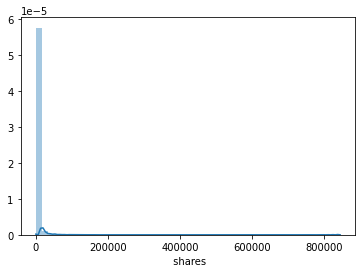

In [13]:
sns.distplot(d[' shares']) #Highly right skewed

In [14]:
d[' shares'].skew() #Proof of highly right skewed data

33.96388487571415

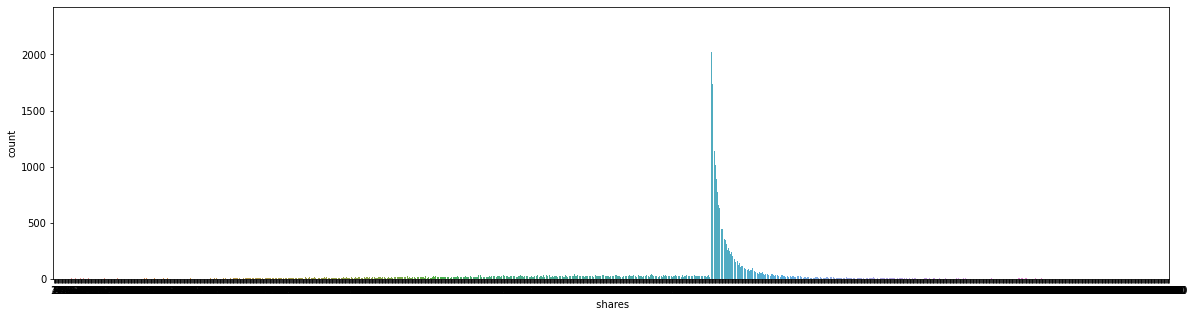

In [15]:
plt.figure(figsize=(20,5)) #Sudden peak at 2000band a gradual fall post that
sns.countplot(d[' shares'])
plt.show()

In [16]:
d[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

Shares are highly right skewed and post a certain count around 1400 the no. of shares are increasing drastically but the count is very less. We will look how the number of variables stand 1400 as the benchmark for popular and unpopular posts. Or can we use the mean. The idea is to have a balanced bifurcation.

In [17]:
d[' shares'][d[' shares']>=1400].count(), d[' shares'][d[' shares']<1400].count()

(21154, 18490)

In [18]:
d[' shares'][d[' shares']>=3395].count(), d[' shares'][d[' shares']<3395].count()

(8079, 31565)


So its clear that we divide teh data as popular and unpopular with 1400 as the threshold.


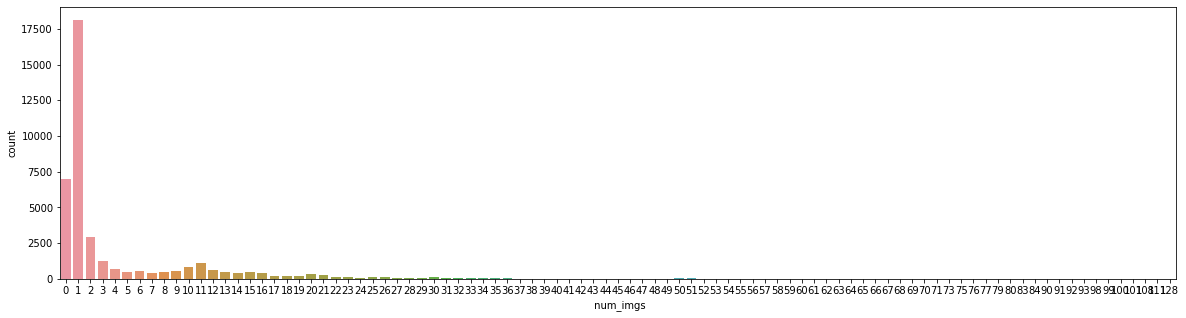

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(d[' num_imgs'])
plt.show()

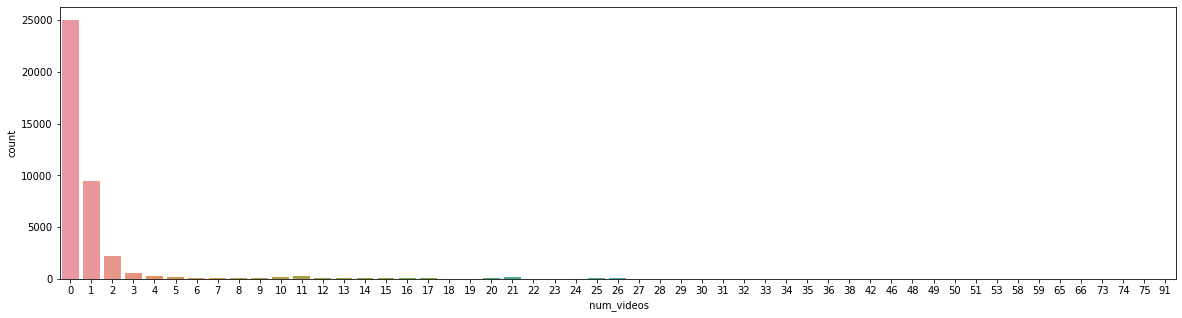

In [20]:
plt.figure(figsize=(20,5)) #we see a minute spike at 11 and 21
sns.countplot(d[' num_videos'])
plt.show()


Looking at the number of images and videos, they are highly right skewed. However the performance of the articles with more than 10 images or more than 5 videos seems to be the same, we will combine them and create a new category as 'Others'.

In [21]:
d[' num_imgs'][d[' num_imgs']>10]='Others'
d[' num_imgs'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1         18119
0          6987
Others     6297
2          2965
3          1223
10          860
4           668
6           571
9           546
8           509
5           478
7           421
Name:  num_imgs, dtype: int64

In [22]:
d[' num_videos'][d[' num_videos']>5]='Others'
d[' num_videos'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         25026
1          9483
2          2189
Others     2025
3           527
4           245
5           149
Name:  num_videos, dtype: int64

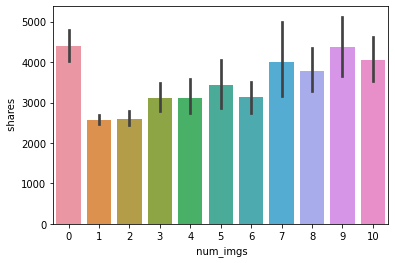

In [23]:
sns.barplot(d[' num_imgs'][d[' num_imgs']!='Others'], d[' shares'])
plt.show()

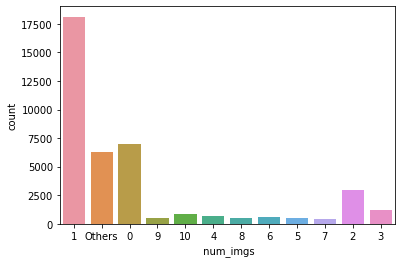

In [24]:
sns.countplot(d[' num_imgs'])
plt.show()

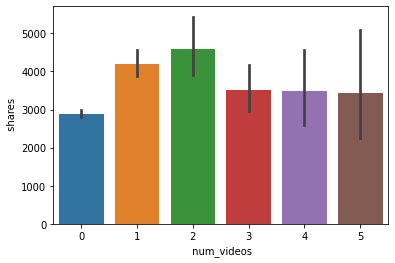

In [25]:
sns.barplot(d[' num_videos'][d[' num_videos']!='Others'], d[' shares'])
plt.show()

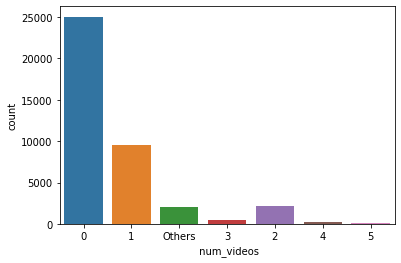

In [26]:
sns.countplot(d[' num_videos'])
plt.show()

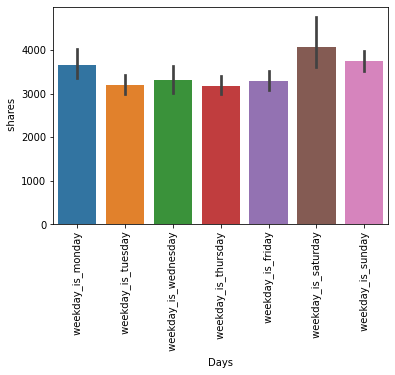

In [27]:
sns.barplot(d['Days'], d[' shares'])
plt.xticks(rotation = 90)
plt.show()

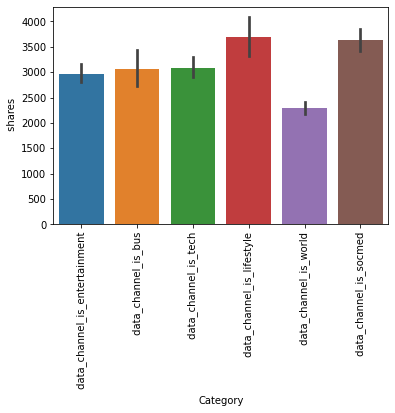

In [28]:
sns.barplot(d['Category'], d[' shares'])
plt.xticks(rotation = 90)
plt.show()

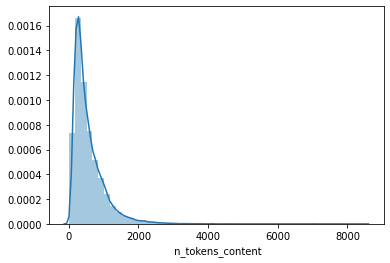

In [29]:
sns.distplot(d[' n_tokens_content'])
plt.show()

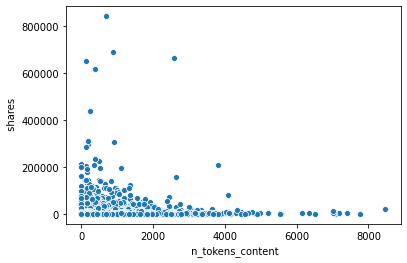

In [30]:
sns.scatterplot(d[' n_tokens_content'], d[' shares'])
plt.show()

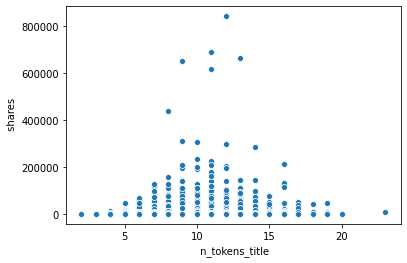

In [31]:
sns.scatterplot(d[' n_tokens_title'], d[' shares'])
plt.show()

Obs:
1. The number of character in a title is expected to be at an avg of 7 to 16 where the shares are the highest. Too long and too short titles dont work.
2. People dont tend to read longer articles.
3. Lifestyle and socmed get maximum shares.
4. Saturday, SUnday amon Monday pose to be the best time for uploading artiles, sice they getthe maximum shares.
5. Most articles have 1 or 0 videos, however articles with 2 or 6 videos garner maximum shares.
6. While most articles have no or 1 image, but the articles with 2 or 9 images garner maximum shares.

We will now find correlation between the remaining numerical varibales and try to apply PCA for dimension reduction.

In [32]:
d.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', '

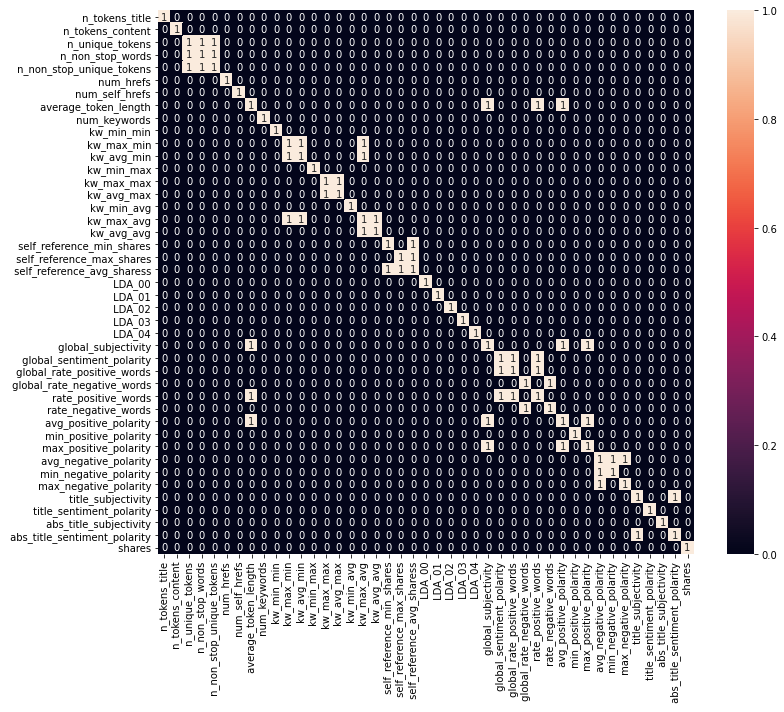

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(d[[' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares']].corr()>=0.5, annot = True)
plt.show()

NOne of them have a strong correlation with shares that can be dropped. We will check with pairplot for teh gaussians in teh data.

In [34]:
from sklearn.decomposition import PCA
# Create a database with only numerical values as principle compomnent analysis works only on numerical dataset.

pca_data = df[[' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']]
pca_data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [35]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(pca_data)
x_std
# Scale the data using StandardScaler

array([[ 0.75744723, -0.69521045,  0.03277187, ..., -0.97543219,
        -1.81071884,  0.13891975],
       [-0.66165665, -0.61879381,  0.01605588, ..., -0.26907618,
         0.83774863, -0.68965812],
       [-0.66165665, -0.71219192,  0.00764453, ..., -0.26907618,
         0.83774863, -0.68965812],
       ...,
       [-0.18862202, -0.2218518 , -0.00904959, ...,  0.24463728,
        -1.56994907, -0.08705603],
       [-2.08076053,  0.28759248, -0.00247749, ..., -0.26907618,
         0.83774863, -0.68965812],
       [-0.18862202, -0.82681689,  0.04367671, ...,  0.67273184,
        -0.92789635,  0.41511238]])

In [36]:
pca = PCA()
pca.fit(x_std)
# Fit PCA on the scaled data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_.round(2)
# Explained variance

array([4.68, 3.81, 3.41, 3.  , 2.59, 2.41, 2.25, 2.2 , 1.72, 1.63, 1.4 ,
       1.26, 1.22, 1.16, 1.08, 0.95, 0.89, 0.81, 0.72, 0.69, 0.65, 0.62,
       0.57, 0.56, 0.53, 0.46, 0.45, 0.41, 0.34, 0.3 , 0.26, 0.24, 0.18,
       0.13, 0.1 , 0.08, 0.08, 0.06, 0.04, 0.03, 0.03, 0.  , 0.  , 0.  ])

In [38]:
pc_score = pca.transform(x_std)
pc_score.round(2)

array([[-0.73, -2.2 , -2.08, ...,  0.01,  0.  , -0.  ],
       [ 1.15, -3.7 , -1.7 , ...,  0.01, -0.01, -0.  ],
       [-3.  , -3.67, -1.83, ..., -0.01,  0.02,  0.  ],
       ...,
       [-0.15,  2.47, -0.19, ..., -0.01, -0.01, -0.  ],
       [ 2.69,  0.55, -2.98, ...,  0.  ,  0.  , -0.  ],
       [ 0.71, -0.24,  1.85, ...,  0.01, -0.  ,  0.  ]])

In [39]:
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100 , decimals = 1)
exp_var
# Explained variance in the percentage 

array([10.6,  8.7,  7.7,  6.8,  5.9,  5.5,  5.1,  5. ,  3.9,  3.7,  3.2,
        2.9,  2.8,  2.6,  2.4,  2.2,  2. ,  1.8,  1.6,  1.6,  1.5,  1.4,
        1.3,  1.3,  1.2,  1. ,  1. ,  0.9,  0.8,  0.7,  0.6,  0.6,  0.4,
        0.3,  0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ])

In [40]:
np.cumsum(exp_var)
# Cumulative explained variance

array([ 10.6,  19.3,  27. ,  33.8,  39.7,  45.2,  50.3,  55.3,  59.2,
        62.9,  66.1,  69. ,  71.8,  74.4,  76.8,  79. ,  81. ,  82.8,
        84.4,  86. ,  87.5,  88.9,  90.2,  91.5,  92.7,  93.7,  94.7,
        95.6,  96.4,  97.1,  97.7,  98.3,  98.7,  99. ,  99.2,  99.4,
        99.6,  99.7,  99.8,  99.9, 100. , 100. , 100. , 100. ])

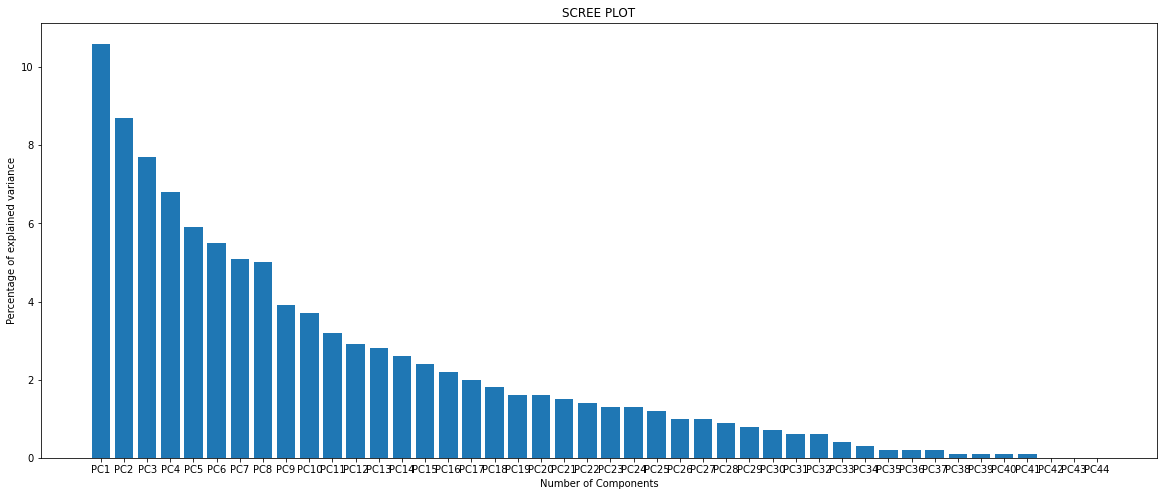

In [41]:
labels = ['PC' + str(x) for x in range(1 , len(exp_var) + 1)]
plt.figure(figsize = (20,8))
plt.bar(x = range(1 , len(exp_var)+1) , height = exp_var, tick_label = labels)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of explained variance')
plt.title('SCREE PLOT')
plt.show()

# Scree plot to  identify the the optimum principle components

In [42]:
final_db = pd.DataFrame(pca_data)
final_db.columns = labels
final_db.index = d.index
final_db.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


We are loking at variables explaiing atleast 90% variance. Hence we go ahead with 16 PCA variables where individual variance is ~1 and total is about 90.

In [43]:
final_db = final_db.drop(final_db[labels[17:]], axis = 1)
final_db.shape

(39644, 17)

In [44]:
final_db['shares'] = d[' shares']
final_db['Days'] = d['Days']
final_db['Category'] = d['Category']
final_db.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,shares,Days,Category
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,0.0,0.0,0,0,0.0,593,weekday_is_monday,data_channel_is_entertainment
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0.0,0.0,0,0,0.0,711,weekday_is_monday,data_channel_is_bus
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0.0,0.0,0,0,0.0,1500,weekday_is_monday,data_channel_is_bus
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,0.0,0.0,0,0,0.0,1200,weekday_is_monday,data_channel_is_entertainment
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0.0,0.0,0,0,0.0,505,weekday_is_monday,data_channel_is_tech


In [45]:
final_db.dtypes

PC1           int64
PC2           int64
PC3         float64
PC4         float64
PC5         float64
PC6           int64
PC7           int64
PC8           int64
PC9           int64
PC10        float64
PC11          int64
PC12          int64
PC13        float64
PC14        float64
PC15          int64
PC16          int64
PC17        float64
shares        int64
Days         object
Category     object
dtype: object

As decided earlier, we are will convert our regression problem to a binary classification problem.
At 1400 shoes we have set a threshold for popular and unpopular articles.
Idea is to have a balanced dataset.

In [46]:
final_db["shares"][final_db["shares"]<=1400] = 0
final_db["shares"][final_db["shares"]>1400] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
db = pd.get_dummies(final_db)
db.shape


(39644, 31)

In [59]:
X = db.drop(['shares'], axis = 1)
y = db['shares']

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,cohen_kappa_score


In [62]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
ypred_LR = LR.predict(xtest)
acc_lr = accuracy_score(ytest, ypred_LR)
cm_lr = confusion_matrix(ytest, ypred_LR)
print(classification_report(ytest, ypred_LR))
print('Accuracy score ', acc_lr)
print('Confusion Matrix ', cm_lr)

print('Cohen Kappa score ', cohen_kappa_score(ytest,ypred_LR))

              precision    recall  f1-score   support

           0       0.55      0.66      0.60      6025
           1       0.56      0.44      0.49      5869

    accuracy                           0.55     11894
   macro avg       0.55      0.55      0.54     11894
weighted avg       0.55      0.55      0.54     11894

Accuracy score  0.5500252228014125
Confusion Matrix  [[3984 2041]
 [3311 2558]]
Cohen Kappa score  0.09736695643838711


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [64]:
model = []
model.append(['LogisticRegression', LogisticRegression()])
model.append(['DecisionTreeClassifier', DecisionTreeClassifier()])
model.append(['RandomForestClassifier', RandomForestClassifier()])
model.append(['GaussianNB', GaussianNB()])
model.append(['KNeighborsClassifier', KNeighborsClassifier()])
model


[['LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)],
 ['DecisionTreeClassifier',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')],
 ['RandomForestClassifier',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_fea

In [65]:
acc_test = []
acc_train = []
kappa = []
name = []

for k, i in model:
    i.fit(xtrain, ytrain)
    ypred = i.predict(xtest)
    ypred2 = i.predict(xtrain)
    
    name.append(k)
    acc_test.append(accuracy_score(ytest, ypred))
    acc_train.append(accuracy_score(ytrain, ypred2))
    kappa.append(cohen_kappa_score(ytest,ypred))
    
    print(k)
    #print(classification_report(ytest, ypred))
    print('Train Accuracy score: ', accuracy_score(ytrain, ypred2))
    print('Test Accuracy score: ', accuracy_score(ytest, ypred))
    print('Confusion Matrix: \n ', confusion_matrix(ytest, ypred))
    print('Cohen Kappa score: ', cohen_kappa_score(ytest,ypred), '\n\n')
    

LogisticRegression
Train Accuracy score:  0.544
Test Accuracy score:  0.5500252228014125
Confusion Matrix: 
  [[3984 2041]
 [3311 2558]]
Cohen Kappa score:  0.09736695643838711 


DecisionTreeClassifier
Train Accuracy score:  0.9999639639639639
Test Accuracy score:  0.5707079199596435
Confusion Matrix: 
  [[3457 2568]
 [2538 3331]]
Cohen Kappa score:  0.14132493888750874 


RandomForestClassifier
Train Accuracy score:  0.9999639639639639
Test Accuracy score:  0.6467967042206154
Confusion Matrix: 
  [[3944 2081]
 [2120 3749]]
Cohen Kappa score:  0.2934110812634414 


GaussianNB
Train Accuracy score:  0.5222702702702703
Test Accuracy score:  0.5230368252900622
Confusion Matrix: 
  [[5347  678]
 [4995  874]]
Cohen Kappa score:  0.036736752990428 


KNeighborsClassifier
Train Accuracy score:  0.7051171171171171
Test Accuracy score:  0.5397679502270052
Confusion Matrix: 
  [[3371 2654]
 [2820 3049]]
Cohen Kappa score:  0.07904030287392605 




In [66]:
with_pca = pd.DataFrame(columns = ['Model', 'Test Accuracy', 'Train Accuracy', 'Cohen Kappa'])
with_pca['Model'] = name
with_pca['Test Accuracy'] = acc_test
with_pca['Train Accuracy'] = acc_train
with_pca['Cohen Kappa'] = kappa
with_pca

,Model,Test Accuracy,Train Accuracy,Cohen Kappa
0,LogisticRegression,0.550025,0.544000,0.097367
1,DecisionTreeClassifier,0.570708,0.999964,0.141325
2,RandomForestClassifier,0.646797,0.999964,0.293411
3,GaussianNB,0.523037,0.522270,0.036737
4,KNeighborsClassifier,0.539768,0.705117,0.079040


In [67]:
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain)
ypred_RF = RF.predict(xtest)
acc_RF = accuracy_score(ytest, ypred_RF)
cm_RF = confusion_matrix(ytest, ypred_RF)
print(classification_report(ytest, ypred_RF))
print('Accuracy score ', acc_RF)
print('Confusion Matrix ', cm_RF)

print('Cohen Kappa score ', cohen_kappa_score(ytest,ypred_RF))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65      6025
           1       0.64      0.63      0.64      5869

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894

Accuracy score  0.6458718681688246
Confusion Matrix  [[3975 2050]
 [2162 3707]]
Cohen Kappa score  0.29144682637234354


In [68]:
importances = pd.DataFrame({'feature':xtrain.columns,'importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [69]:
importances

,importance
feature,
PC17,0.081
PC14,0.080
PC10,0.078
PC5,0.077
PC3,0.076
PC2,0.076
PC13,0.075
PC6,0.060
PC15,0.056


In [70]:
X1 = X.drop(['Days_ weekday_is_monday','Days_ weekday_is_sunday','Days_ weekday_is_thursday', 'Category_ data_channel_is_socmed','Days_ weekday_is_friday'	,
            'Category_ data_channel_is_bus','Category_ data_channel_is_tech', 'Category_ data_channel_is_lifestyle', 'PC4'], axis = 1)
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(X1,y,test_size=0.3,random_state=0,stratify=y)

In [72]:
xtrain1.shape, xtest1.shape, ytrain1.shape, ytest1.shape

((27750, 21), (11894, 21), (27750,), (11894,))

In [74]:
RF2 = RandomForestClassifier()
RF2.fit(xtrain1, ytrain1)
ypred_RF2 = RF2.predict(xtest1)
acc_RF2 = accuracy_score(ytest1, ypred_RF2)
cm_RF2 = confusion_matrix(ytest1, ypred_RF2)
print(classification_report(ytest1, ypred_RF2))
print('Accuracy score ', acc_RF2)
print('Confusion Matrix ', cm_RF2)

print('Cohen Kappa score ', cohen_kappa_score(ytest1,ypred_RF2))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      6025
           1       0.63      0.63      0.63      5869

    accuracy                           0.64     11894
   macro avg       0.64      0.64      0.64     11894
weighted avg       0.64      0.64      0.64     11894

Accuracy score  0.637464267697999
Confusion Matrix  [[3903 2122]
 [2190 3679]]
Cohen Kappa score  0.2746949894897306


In [75]:
DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)
ypred_DT = DT.predict(xtest)
acc_DT = accuracy_score(ytest, ypred_DT)
cm_DT = confusion_matrix(ytest, ypred_DT)
print(classification_report(ytest, ypred_DT))
print('Accuracy score ', acc_DT)
print('Confusion Matrix ', cm_DT)

print('Cohen Kappa score ', cohen_kappa_score(ytest,ypred_DT))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58      6025
           1       0.57      0.57      0.57      5869

    accuracy                           0.57     11894
   macro avg       0.57      0.57      0.57     11894
weighted avg       0.57      0.57      0.57     11894

Accuracy score  0.5721372120396839
Confusion Matrix  [[3457 2568]
 [2521 3348]]
Cohen Kappa score  0.14421591481668672


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 20),
    'min_samples_leaf': range(1, 10 ),
    'min_samples_split': range(1, 10),
    'criterion': ["entropy", 'gini']
}

n_folds = 3

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = DT, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X,y)
print("best accuracy", grid_search.best_score_)

print(grid_search.best_params_)

Fitting 3 folds for each of 3078 candidates, totalling 9234 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_sample

best accuracy 0.6259718044412742
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 3}


In [76]:
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf=9, min_samples_split= 3)
DT.fit(xtrain, ytrain)
ypred_DT = DT.predict(xtest)
acc_DT = accuracy_score(ytest, ypred_DT)
cm_DT = confusion_matrix(ytest, ypred_DT)
print(classification_report(ytest, ypred_DT))
print('Accuracy score ', acc_DT)
print('Confusion Matrix ', cm_DT)

print('Cohen Kappa score ', cohen_kappa_score(ytest,ypred_DT))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6025
           1       0.63      0.60      0.61      5869

    accuracy                           0.63     11894
   macro avg       0.63      0.63      0.63     11894
weighted avg       0.63      0.63      0.63     11894

Accuracy score  0.6272910711283
Confusion Matrix  [[3923 2102]
 [2331 3538]]
Cohen Kappa score  0.25407709613111984


In [79]:
RF = RandomForestClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf=9, min_samples_split= 3)
RF.fit(xtrain, ytrain)
ypred_RF = RF.predict(xtest)
acc_RF = accuracy_score(ytest, ypred_RF)
cm_RF = confusion_matrix(ytest, ypred_RF)
print(classification_report(ytest, ypred_RF))
print('Accuracy score ', acc_RF)
print('Confusion Matrix ', cm_RF)

print('Cohen Kappa score ', cohen_kappa_score(ytest,ypred_RF))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6025
           1       0.63      0.64      0.63      5869

    accuracy                           0.64     11894
   macro avg       0.64      0.64      0.64     11894
weighted avg       0.64      0.64      0.64     11894

Accuracy score  0.6385572557592063
Confusion Matrix  [[3861 2164]
 [2135 3734]]
Cohen Kappa score  0.2770363827014952
